## Generate weekly statistics (mean, median, mode) for number of cases and deaths across a specific "state".


- importing the libraries

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

- reading the csv files

In [35]:
cases_data = pd.read_csv("./covid_confirmed_usafacts.csv")
deaths_data = pd.read_csv("./covid_deaths_usafacts.csv")
population_data = pd.read_csv("./covid_county_population_usafacts.csv")

- Applied the state filter on deaths. I am choosing NC.
 - Derived the date columns with specific date range

In [53]:
import pandas as pd

# Applying the state filter NC
deaths_data = deaths_data[deaths_data["State"] == "NC"]

# Identify date columns by excluding specific non-date columns
date_columns = deaths_data.columns[~deaths_data.columns.isin(["countyFIPS", "County Name", "State", "StateFIPS"])]

# Extract the columns with dates only
dates = deaths_data.loc[:, date_columns]

# Convert the column names to datetime format
dates.columns = pd.to_datetime(dates.columns)
start_date= '2020-07-06'
end_date= '2020-12-27'

#Applying the date range.
filtered_dates = dates.loc[:, (dates.columns >= start_date) & (dates.columns <= end_date)]
 

print(filtered_dates)

      countyFIPS            County Name State  StateFIPS  2020-01-22  \
1923           0  Statewide Unallocated    NC         37           0   
1924       37001       Alamance County     NC         37           0   
1925       37003      Alexander County     NC         37           0   
1926       37005      Alleghany County     NC         37           0   
1927       37007          Anson County     NC         37           0   
...          ...                    ...   ...        ...         ...   
2019       37191          Wayne County     NC         37           0   
2020       37193         Wilkes County     NC         37           0   
2021       37195         Wilson County     NC         37           0   
2022       37197         Yadkin County     NC         37           0   
2023       37199         Yancey County     NC         37           0   

      2020-01-23  2020-01-24  2020-01-25  2020-01-26  2020-01-27  ...  \
1923           0           0           0           0          

- calculating weekly statistics (mean, median, and mode) for a set of data (filtered_dates) that represents daily values across several weeks. 
- Generating a list of weekly date ranges, iterating through these ranges to sum values for each week.
- Computing the mean, median, and mode of these sums, and then storing these statistics in a DataFrame called stats, which is printed at the end.

In [4]:
import pandas as pd


# Generate a list of week ranges
weeks = [list(range(i, min(i + 7, len(filtered_dates.columns)))) for i in range(0, len(filtered_dates.columns), 7)]

# Initialize a list to store weekly statistics temporarily
weekly_stats = []

for week_indices in weeks:
    # Extract the columns for the current week using iloc
    current_week_data = filtered_dates.iloc[:, week_indices]

    # Get the start date of the week (the name of the first column in the current week)
    week_start_date = current_week_data.columns[0]

    # Calculate the sum of values for each row (over the columns of the current week)
    weekly_sum = current_week_data.sum(axis=1)

    # Calculate mean, median, and mode of the weekly sum
    weekly_mean = weekly_sum.mean()
    weekly_median = weekly_sum.median()
    weekly_mode = weekly_sum.mode()[0] if not weekly_sum.mode().empty else None

    # Append the computed statistics to the list
    weekly_stats.append({
        "week_start_date": week_start_date,
        "mean": weekly_mean,
        "median": weekly_median,
        "mode": weekly_mode
    })

# Convert the list of dictionaries to a DataFrame
stats = pd.DataFrame(weekly_stats)

# Assuming you want to display the 'stats' DataFrame
print(stats)


   week_start_date        mean  median  mode
0       2020-07-06  100.831683    35.0     0
1       2020-07-13  109.504950    41.0     0
2       2020-07-20  119.237624    46.0     0
3       2020-07-27  130.623762    56.0     0
4       2020-08-03  144.425743    70.0    14
5       2020-08-10  157.059406    77.0    14
6       2020-08-17  170.138614    83.0    14
7       2020-08-24  181.782178    92.0     0
8       2020-08-31  194.108911   119.0     0
9       2020-09-07  206.673267   119.0    21
10      2020-09-14  219.584158   123.0    21
11      2020-09-21  232.613861   141.0    21
12      2020-09-28  246.742574   161.0    21
13      2020-10-05  257.425743   168.0    21
14      2020-10-12  268.000000   182.0    21
15      2020-10-19  278.584158   184.0    21
16      2020-10-26  288.801980   196.0    21
17      2020-11-02  310.089109   223.0    21
18      2020-11-09  324.762376   230.0    21
19      2020-11-16  338.039604   238.0    21
20      2020-11-23  354.138614   245.0    21
21      20

In [6]:
mean_columns_deaths = stats['mean']
#print(mean_columns_deaths)

In [7]:
medians_columns_deaths = stats['median']
#print(medians_columns_deaths)

In [8]:
mode_columns_deaths = stats['mode']
#print(mode_columns_deaths)

- Plotting the mean, median and mode for deaths

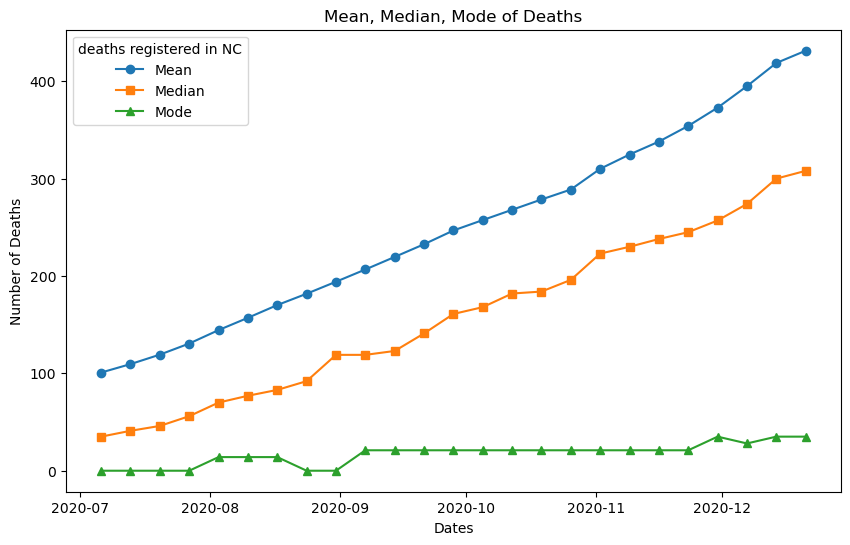

In [112]:
import matplotlib.pyplot as plt
# Plotting
plt.figure(figsize=(10, 6))

# Plot each series with markers
plt.plot(weak_start_date, mean_columns_deaths, marker='o', label='Mean')
plt.plot(weak_start_date, medians_columns_deaths, marker='s', label='Median')
plt.plot(weak_start_date, mode_columns_deaths, marker='^', label='Mode')

# Adding labels and title
plt.xlabel('Dates')
plt.ylabel('Number of Deaths')
plt.title('Mean, Median, Mode of Deaths')

# Customize the legend
plt.legend(title="deaths registered in NC")

# Show the plot
plt.show()

#### Mean median mode for cases.
- filtering  cases_data for cases in North Carolina (NC), 
- extracting  columns representing dates within a specified range (from 2020-07-06 to 2020-12-27), and converting these date columns to datetime format.
- Then calculating weekly statistics (mean, median, and mode) based on the sum of cases for each week within this range, storing these statistics in a DataFrame stats_cases.

In [11]:
import pandas as pd

# Assuming deaths_data is your DataFrame and is already defined
cases_data = cases_data[cases_data["State"] == "NC"]
#print(cases_data)

# Identify date columns by excluding specific non-date columns
date_columns = cases_data.columns[~cases_data.columns.isin(["countyFIPS", "County Name", "State", "StateFIPS"])]

# Extract the columns with dates only
dates = cases_data.loc[:, date_columns]

# Convert the column names to datetime format
dates.columns = pd.to_datetime(dates.columns)
start_date= '2020-07-06'
end_date= '2020-12-27'
filtered_dates_cases = dates.loc[:, (dates.columns >= start_date) & (dates.columns <= end_date)]
 

#print(filtered_dates_cases)
weeks = [list(range(i, min(i + 7, len(filtered_dates_cases.columns)))) for i in range(0, len(filtered_dates_cases.columns), 7)]

# Initialize a list to store weekly statistics temporarily
weekly_stats = []

for week_indices in weeks:
    # Extract the columns for the current week using iloc
    current_week_data = filtered_dates_cases.iloc[:, week_indices]

    # Get the start date of the week (the name of the first column in the current week)
    week_start_date = current_week_data.columns[0]

    # Calculate the sum of values for each row (over the columns of the current week)
    weekly_sum = current_week_data.sum(axis=1)

    # Calculate mean, median, and mode of the weekly sum
    weekly_mean = weekly_sum.mean()
    weekly_median = weekly_sum.median()
    weekly_mode = weekly_sum.mode()[0] if not weekly_sum.mode().empty else None

    # Append the computed statistics to the list
    weekly_stats.append({
        "week_start_date": week_start_date,
        "mean": weekly_mean,
        "median": weekly_median,
        "mode": weekly_mode
    })

# Convert the list of dictionaries to a DataFrame
stats_cases = pd.DataFrame(weekly_stats)

# Assuming you want to display the 'stats' DataFrame
print(stats_cases)



   week_start_date          mean   median  mode
0       2020-07-06   5523.158416   2540.0  1229
1       2020-07-13   6484.168317   3022.0     6
2       2020-07-20   7410.039604   3373.0   242
3       2020-07-27   8313.693069   3911.0  1642
4       2020-08-03   9098.386139   4327.0     0
5       2020-08-10   9801.217822   4845.0  1165
6       2020-08-17  10484.485149   5203.0   346
7       2020-08-24  11247.821782   5869.0   365
8       2020-08-31  11936.099010   6166.0   467
9       2020-09-07  12551.980198   6407.0     0
10      2020-09-14  13138.633663   6600.0   751
11      2020-09-21  13884.148515   7211.0     0
12      2020-09-28  14751.683168   7426.0     0
13      2020-10-05  15623.653465   7887.0     0
14      2020-10-12  16573.000000   8649.0     0
15      2020-10-19  17524.386139   9366.0  1279
16      2020-10-26  18418.584158   9956.0     0
17      2020-11-02  19727.316832  10770.0     0
18      2020-11-09  20976.584158  11478.0    10
19      2020-11-16  22481.386139  12356.

- Plotting the mean, median and mode for cases in NC.

<Axes: xlabel='week_start_date'>

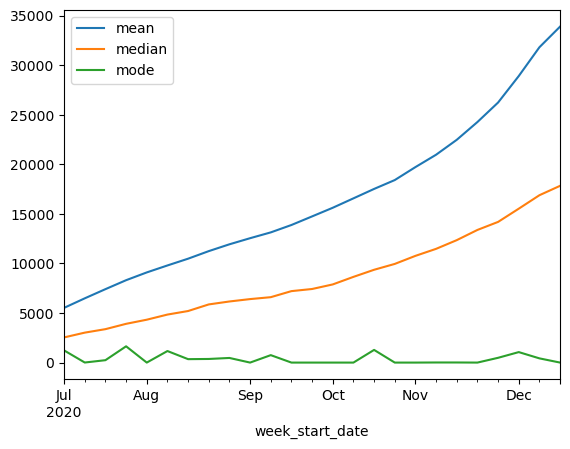

In [13]:
stats_cases.plot(x = "week_start_date")

## Compare the data against other states (compare against 5 states)Normalize by population, use a normalization factor which is able to identify cases and deaths, for example try per 10,000 or 100,000 (this depends on the population). Plot the values across the weeks in a line plot for the 5 states in a single graph. Describe why the rates differ across these states in the notebook. Identify the peaks, do they compare with the US pattern?

The below code defines a function "getthestatisticaldatabystate" that takes a state abbreviation (e.g., "NC" for North Carolina) as input and performs several operations on a CSV file named covid_confirmed_usafacts.csv, which is assumed to contain COVID-19 confirmed case data for various counties across the United States. The function filters the data for the specified state, selects date columns within the range from July 6, 2020, to December 27, 2020 (converting them to datetime format), and calculates weekly statistics (mean, median, and mode) based on the sum of cases for each week. It segments the date range into weeks, computes the sum of cases for each week, and then calculates the mean, median, and mode of these weekly sums for the selected state. These statistics are compiled into a DataFrame, which is returned by the function. This process enables analysis of COVID-19 case trends over time within the specified state.

In [113]:
import pandas as pd

def getthestatisticaldatabystate(state : str):
    # Assuming deaths_data is your DataFrame and is already defined
    cases_data = pd.read_csv("./covid_confirmed_usafacts.csv")
    cases_data_for_state = cases_data[cases_data["State"] == state]
    #print(cases_data)

    # Identify date columns by excluding specific non-date columns
    date_columns = cases_data_for_state.columns[~cases_data.columns.isin(["countyFIPS", "County Name", "State", "StateFIPS"])]

    # Extract the columns with dates only
    dates = cases_data_for_state.loc[:, date_columns]

    # Convert the column names to datetime format
    dates.columns = pd.to_datetime(dates.columns)
    start_date= '2020-07-06'
    end_date= '2020-12-27'
    filtered_dates_cases = dates.loc[:, (dates.columns >= start_date) & (dates.columns <= end_date)]


    #print(filtered_dates_cases)
    weeks = [list(range(i, min(i + 7, len(filtered_dates_cases.columns)))) for i in range(0, len(filtered_dates_cases.columns), 7)]

    # Initialize a list to store weekly statistics temporarily
    weekly_stats = []

    for week_indices in weeks:
        # Extract the columns for the current week using iloc
        current_week_data = filtered_dates_cases.iloc[:, week_indices]

        # Get the start date of the week (the name of the first column in the current week)
        week_start_date = current_week_data.columns[0]

        # Calculate the sum of values for each row (over the columns of the current week)
        weekly_sum = current_week_data.sum(axis=1)

        # Calculate mean, median, and mode of the weekly sum
        weekly_mean = weekly_sum.mean()
        weekly_median = weekly_sum.median()
        weekly_mode = weekly_sum.mode()[0] if not weekly_sum.mode().empty else None

        # Append the computed statistics to the list
        weekly_stats.append({
            "week_start_date": week_start_date,
            "mean": weekly_mean,
            "median": weekly_median,
            "mode": weekly_mode
        })

    # Convert the list of dictionaries to a DataFrame
    stats_cases_for_states_and_dates = pd.DataFrame(weekly_stats)
    return stats_cases_for_states_and_dates
    # Assuming you want to display the 'stats' DataFrame
    #print(stats_cases)

The below code sequence generates statistical summaries (mean, median, mode) of COVID-19 cases on a weekly basis for six U.S. states (Florida, Alabama, Texas, North Dakota, Michigan, and North Carolina) from a dataset (cases_data). It leverages a custom function getthestatisticaldatabystate to filter the data by state and compute weekly statistics for the date range between July 6, 2020, and December 27, 2020. After computing these statistics, it renames the columns for clarity, indicating the statistic type and the state it belongs to.

The below code then consolidates the weekly mean, median, and mode of cases for all selected states into separate DataFrames (mean_all_states_cases, median_of_all_states_cases, mode_of_all_states_cases) and plots these statistics over time using the week_start_date as the x-axis. This approach visualizes the trend of COVID-19 case statistics across the specified period, allowing for a comparison of the pandemic's progression in different states.

<Axes: xlabel='week_start_date'>

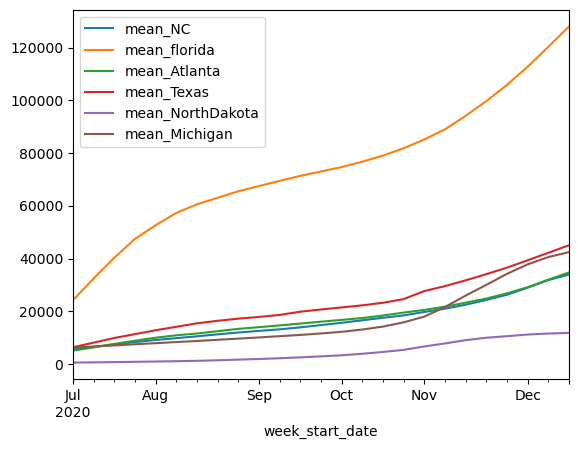

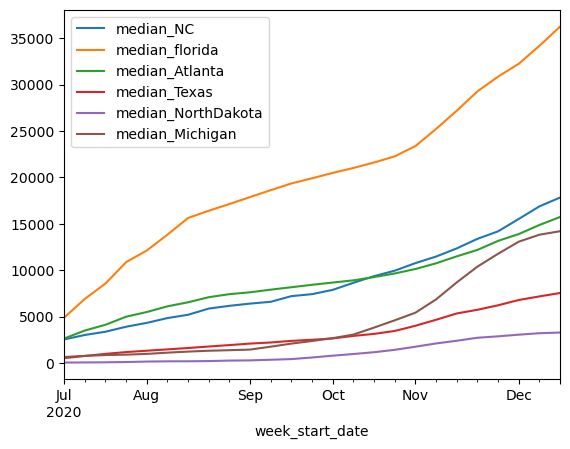

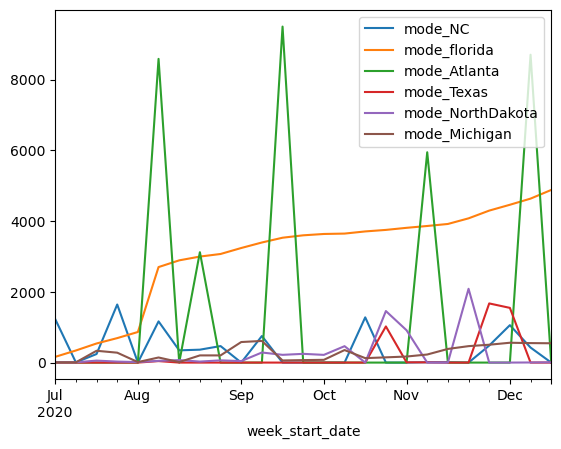

In [19]:
#states = ["FL", "NC", "AL", "TX", "ND", "MI"]
Florida_case_stats = getthestatisticaldatabystate("FL")
Florida_case_stats.rename(columns = {'mean':'mean_florida','median':'median_florida','mode':'mode_florida'}, inplace = True)

Atlanta_case_stats = getthestatisticaldatabystate("AL")
Atlanta_case_stats.rename(columns = {'mean':'mean_Atlanta','median':'median_Atlanta','mode':'mode_Atlanta'}, inplace = True)

Texas_case_stats = getthestatisticaldatabystate("TX")
Texas_case_stats.rename(columns = {'mean':'mean_Texas','median':'median_Texas','mode':'mode_Texas'}, inplace = True)

NorthDakota_case_stats = getthestatisticaldatabystate("ND")
NorthDakota_case_stats.rename(columns = {'mean':'mean_NorthDakota','median':'median_NorthDakota','mode':'mode_NorthDakota'}, inplace = True)

Michigan_case_stats = getthestatisticaldatabystate("MI")
Michigan_case_stats.rename(columns = {'mean':'mean_Michigan','median':'median_Michigan','mode':'mode_Michigan'}, inplace = True)

NC_case_stats = getthestatisticaldatabystate("NC")
NC_case_stats.rename(columns = {'mean':'mean_NC','median':'median_NC','mode':'mode_NC'}, inplace = True)

week_start = Florida_case_stats[['week_start_date']]
mean_florida = Florida_case_stats[['mean_florida']]
#df.rename(columns={'old_name1': 'new_name1', 'old_name2': 'new_name2'}, inplace=True)
#mean_florida.rename(columns = {'mean':'mean_florida'}, inplace = True)

mean_Atlanta = Atlanta_case_stats[['mean_Atlanta']]
#mean_Atlanta.rename(columns = {'mean':'mean_Atlanta'}, inplace = True)

mean_Texas = Texas_case_stats[['mean_Texas']]
#mean_Texas.rename(columns = {'mean':'mean_Texas'}, inplace = True)

mean_NorthDakota = NorthDakota_case_stats[['mean_NorthDakota']]
#mean_NorthDakota.rename(columns = {'mean':'mean_NorthDakota'}, inplace = True)

mean_Michigan = Michigan_case_stats[['mean_Michigan']]
#mean_Michigan.rename(columns = {'mean':'mean_Michigan'}, inplace = True)

mean_NC = NC_case_stats[['mean_NC']]
#mean_NC.rename(columns = {'mean':'mean_Michigan'}, inplace = True)
#new_df = pd.concat([selected_columns_df1, selected_columns_df2], axis=1)
mean_all_states_cases = pd.concat([week_start, mean_NC, mean_florida, mean_Atlanta, mean_Texas, mean_NorthDakota, mean_Michigan], axis=1)
#print(mean_all_states_cases)
mean_all_states_cases.plot(x = "week_start_date")

##### median of cases
median_florida = Florida_case_stats[['median_florida']]
#df.rename(columns={'old_name1': 'new_name1', 'old_name2': 'new_name2'}, inplace=True)
#mean_florida.rename(columns = {'mean':'mean_florida'}, inplace = True)

median_Atlanta = Atlanta_case_stats[['median_Atlanta']]
#mean_Atlanta.rename(columns = {'mean':'mean_Atlanta'}, inplace = True)

median_Texas = Texas_case_stats[['median_Texas']]
#mean_Texas.rename(columns = {'mean':'mean_Texas'}, inplace = True)

median_NorthDakota = NorthDakota_case_stats[['median_NorthDakota']]
#mean_NorthDakota.rename(columns = {'mean':'mean_NorthDakota'}, inplace = True)

median_Michigan = Michigan_case_stats[['median_Michigan']]
#mean_Michigan.rename(columns = {'mean':'mean_Michigan'}, inplace = True)

median_NC = NC_case_stats[['median_NC']]
#mean_NC.rename(columns = {'mean':'mean_Michigan'}, inplace = True)
#new_df = pd.concat([selected_columns_df1, selected_columns_df2], axis=1)
median_of_all_states_cases = pd.concat([week_start, median_NC, median_florida, median_Atlanta, median_Texas, median_NorthDakota, median_Michigan], axis=1)
#print(mean_all_states_cases)
median_of_all_states_cases.plot(x = "week_start_date")

#### mode of cases

mode_florida = Florida_case_stats[['mode_florida']]
#df.rename(columns={'old_name1': 'new_name1', 'old_name2': 'new_name2'}, inplace=True)
#mean_florida.rename(columns = {'mean':'mean_florida'}, inplace = True)

mode_Atlanta = Atlanta_case_stats[['mode_Atlanta']]
#mean_Atlanta.rename(columns = {'mean':'mean_Atlanta'}, inplace = True)

mode_Texas = Texas_case_stats[['mode_Texas']]
#mean_Texas.rename(columns = {'mean':'mean_Texas'}, inplace = True)

mode_NorthDakota = NorthDakota_case_stats[['mode_NorthDakota']]
#mean_NorthDakota.rename(columns = {'mean':'mean_NorthDakota'}, inplace = True)

mode_Michigan = Michigan_case_stats[['mode_Michigan']]
#mean_Michigan.rename(columns = {'mean':'mean_Michigan'}, inplace = True)

mode_NC = NC_case_stats[['mode_NC']]
#mean_NC.rename(columns = {'mean':'mean_Michigan'}, inplace = True)
#new_df = pd.concat([selected_columns_df1, selected_columns_df2], axis=1)
mode_of_all_states_cases = pd.concat([week_start, mode_NC, mode_florida, mode_Atlanta, mode_Texas, mode_NorthDakota, mode_Michigan], axis=1)
#print(mean_all_states_cases)
mode_of_all_states_cases.plot(x = "week_start_date")


#print(Florida_case_stats)

**Comparing the deaths statistics across the states**
- I implemented the same code as of cases for computing the mean,median and mode values across 5 different states.

In [21]:
import pandas as pd

def get_statisticaldata_of_deaths_by_state(state : str):
    # Assuming deaths_data is your DataFrame and is already defined
    deaths_data = pd.read_csv("./covid_deaths_usafacts.csv")
    deaths_data_state = deaths_data[deaths_data["State"] == state]
    

    # Identify date columns by excluding specific non-date columns
    date_columns = deaths_data_state.columns[~deaths_data_state.columns.isin(["countyFIPS", "County Name", "State", "StateFIPS"])]

    # Extract the columns with dates only
    dates = deaths_data_state.loc[:, date_columns]

    # Convert the column names to datetime format
    dates.columns = pd.to_datetime(dates.columns)
    start_date= '2020-07-06'
    end_date= '2020-12-27'
    filtered_dates = dates.loc[:, (dates.columns >= start_date) & (dates.columns <= end_date)]

    weeks = [list(range(i, min(i + 7, len(filtered_dates.columns)))) for i in range(0, len(filtered_dates.columns), 7)]

    # Initialize a list to store weekly statistics temporarily
    weekly_stats = []

    for week_indices in weeks:
        # Extract the columns for the current week using iloc
        current_week_data = filtered_dates.iloc[:, week_indices]

        # Get the start date of the week (the name of the first column in the current week)
        week_start_date = current_week_data.columns[0]

        # Calculate the sum of values for each row (over the columns of the current week)
        weekly_sum = current_week_data.sum(axis=1)

        # Calculate mean, median, and mode of the weekly sum
        weekly_mean = weekly_sum.mean()
        weekly_median = weekly_sum.median()
        weekly_mode = weekly_sum.mode()[0] if not weekly_sum.mode().empty else None

        # Append the computed statistics to the list
        weekly_stats.append({
            "week_start_date": week_start_date,
            "mean": weekly_mean,
            "median": weekly_median,
            "mode": weekly_mode
        })

    # Convert the list of dictionaries to a DataFrame
    death_stats_for_states = pd.DataFrame(weekly_stats)
    return death_stats_for_states




<Axes: xlabel='week_start_date'>

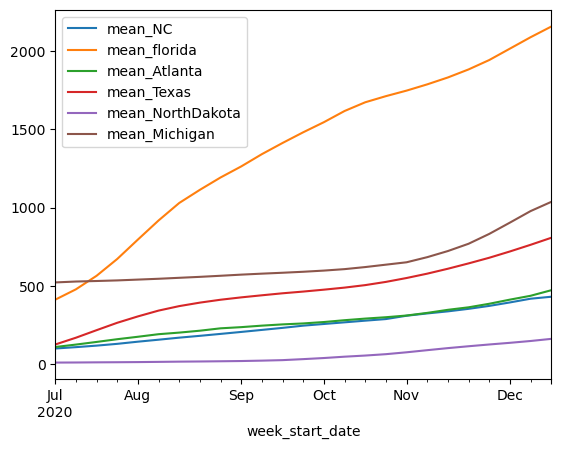

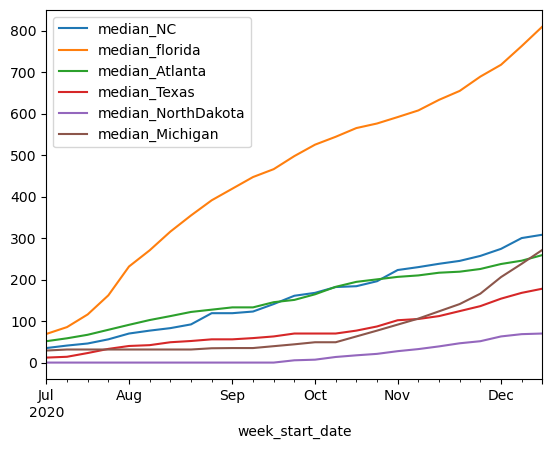

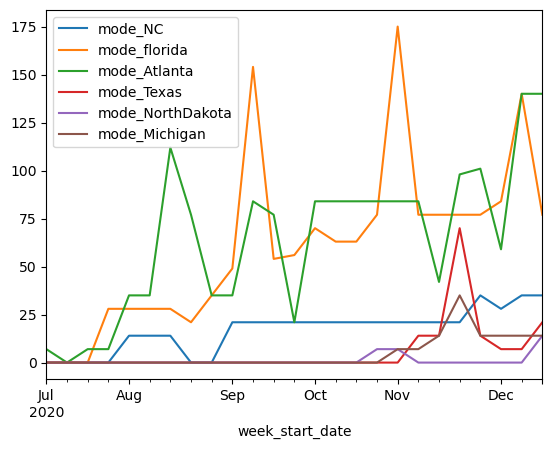

In [23]:
#states = ["FL", "NC", "AL", "TX", "ND", "MI"]
Florida_death_stats = get_statisticaldata_of_deaths_by_state("FL")
#print(Florida_death_stats)

Florida_death_stats.rename(columns = {'mean':'mean_florida','median':'median_florida','mode':'mode_florida'}, inplace = True)

Atlanta_death_stats = get_statisticaldata_of_deaths_by_state("AL")
Atlanta_death_stats.rename(columns = {'mean':'mean_Atlanta','median':'median_Atlanta','mode':'mode_Atlanta'}, inplace = True)

Texas_death_stats = get_statisticaldata_of_deaths_by_state("TX")
Texas_death_stats.rename(columns = {'mean':'mean_Texas','median':'median_Texas','mode':'mode_Texas'}, inplace = True)

NorthDakota_death_stats = get_statisticaldata_of_deaths_by_state("ND")
NorthDakota_death_stats.rename(columns = {'mean':'mean_NorthDakota','median':'median_NorthDakota','mode':'mode_NorthDakota'}, inplace = True)

Michigan_death_stats = get_statisticaldata_of_deaths_by_state("MI")
Michigan_death_stats.rename(columns = {'mean':'mean_Michigan','median':'median_Michigan','mode':'mode_Michigan'}, inplace = True)

NC_death_stats = get_statisticaldata_of_deaths_by_state("NC")
NC_death_stats.rename(columns = {'mean':'mean_NC','median':'median_NC','mode':'mode_NC'}, inplace = True)

week_start = Florida_death_stats[['week_start_date']]
mean_florida = Florida_death_stats[['mean_florida']]
#df.rename(columns={'old_name1': 'new_name1', 'old_name2': 'new_name2'}, inplace=True)
#mean_florida.rename(columns = {'mean':'mean_florida'}, inplace = True)

mean_Atlanta = Atlanta_death_stats[['mean_Atlanta']]
#mean_Atlanta.rename(columns = {'mean':'mean_Atlanta'}, inplace = True)

mean_Texas = Texas_death_stats[['mean_Texas']]
#mean_Texas.rename(columns = {'mean':'mean_Texas'}, inplace = True)

mean_NorthDakota = NorthDakota_death_stats[['mean_NorthDakota']]
#mean_NorthDakota.rename(columns = {'mean':'mean_NorthDakota'}, inplace = True)

mean_Michigan = Michigan_death_stats[['mean_Michigan']]
#mean_Michigan.rename(columns = {'mean':'mean_Michigan'}, inplace = True)

mean_NC = NC_death_stats[['mean_NC']]
#mean_NC.rename(columns = {'mean':'mean_Michigan'}, inplace = True)
#new_df = pd.concat([selected_columns_df1, selected_columns_df2], axis=1)
mean_all_states_cases = pd.concat([week_start, mean_NC, mean_florida, mean_Atlanta, mean_Texas, mean_NorthDakota, mean_Michigan], axis=1)
#print(mean_all_states_cases)
mean_all_states_cases.plot(x = "week_start_date")

##### median of cases
median_florida = Florida_death_stats[['median_florida']]
#df.rename(columns={'old_name1': 'new_name1', 'old_name2': 'new_name2'}, inplace=True)
#mean_florida.rename(columns = {'mean':'mean_florida'}, inplace = True)

median_Atlanta = Atlanta_death_stats[['median_Atlanta']]
#mean_Atlanta.rename(columns = {'mean':'mean_Atlanta'}, inplace = True)

median_Texas = Texas_death_stats[['median_Texas']]
#mean_Texas.rename(columns = {'mean':'mean_Texas'}, inplace = True)

median_NorthDakota = NorthDakota_death_stats[['median_NorthDakota']]
#mean_NorthDakota.rename(columns = {'mean':'mean_NorthDakota'}, inplace = True)

median_Michigan = Michigan_death_stats[['median_Michigan']]
#mean_Michigan.rename(columns = {'mean':'mean_Michigan'}, inplace = True)

median_NC = NC_death_stats[['median_NC']]
#mean_NC.rename(columns = {'mean':'mean_Michigan'}, inplace = True)
#new_df = pd.concat([selected_columns_df1, selected_columns_df2], axis=1)
median_of_all_states_cases = pd.concat([week_start, median_NC, median_florida, median_Atlanta, median_Texas, median_NorthDakota, median_Michigan], axis=1)
#print(mean_all_states_cases)
median_of_all_states_cases.plot(x = "week_start_date")

#### mode of cases

mode_florida = Florida_death_stats[['mode_florida']]
#df.rename(columns={'old_name1': 'new_name1', 'old_name2': 'new_name2'}, inplace=True)
#mean_florida.rename(columns = {'mean':'mean_florida'}, inplace = True)

mode_Atlanta = Atlanta_death_stats[['mode_Atlanta']]
#mean_Atlanta.rename(columns = {'mean':'mean_Atlanta'}, inplace = True)

mode_Texas = Texas_death_stats[['mode_Texas']]
#mean_Texas.rename(columns = {'mean':'mean_Texas'}, inplace = True)

mode_NorthDakota = NorthDakota_death_stats[['mode_NorthDakota']]
#mean_NorthDakota.rename(columns = {'mean':'mean_NorthDakota'}, inplace = True)

mode_Michigan = Michigan_death_stats[['mode_Michigan']]
#mean_Michigan.rename(columns = {'mean':'mean_Michigan'}, inplace = True)

mode_NC = NC_death_stats[['mode_NC']]
#mean_NC.rename(columns = {'mean':'mean_Michigan'}, inplace = True)
#new_df = pd.concat([selected_columns_df1, selected_columns_df2], axis=1)
mode_of_all_states_cases = pd.concat([week_start, mode_NC, mode_florida, mode_Atlanta, mode_Texas, mode_NorthDakota, mode_Michigan], axis=1)
#print(mean_all_states_cases)
mode_of_all_states_cases.plot(x = "week_start_date")


#print(Florida_case_stats)

### Summary
### Describing the rates across selected states
###### On analysing the data and observing the plots, during the initial weeks of the pandeic the number of cases and deaths are comparatively less and there is a constant raise in cases as the time goes on, except for the North State. 
###### The highest number of cases are registered in between november to december for every state. The reasons behind the number of cases recorded are high during the november and the decemeber months and varying rates across the states might be:
1.Being  festive season,
2.Peak winter, 
3.Delay in implementing public health measures, 
4.Inadequate health infrastructure,
5.Global connectivity, not following public health measures, 
###### One of the key reasons behind the rates differing across the states is elaborated below:
###### Low deaths are recorded for NorthDakota and the state of Florida has the highest number of deaths recorded in the last week. 
###### The highest and lowest cases and deaths recorded is basically directly proportional to the population of the state.
###### Beacuse, overall highest number of cases and deaths are recorded for the state of  Florida (highly pouplated among other states) and the lowest cases and deaths are recorded for the NorthDakota state (has lowest population comparatively). So, i observe that the pattern is same across all the five states, that is, the number of cases recorded and the deaths reported are directly proportional to the population of the state.

### Identifying the peak.
##### End of the  december month is the PEAK  (higher cases and deaths are recorded for all the selected states in this period). It might rather be the last week that is, 2020-12-29 to 2021-01-04 if the data of the january is taken into consideration, as we have only taken data from july 2020 to dec 2020 (week starting from monday) that particular week consists of only three days data (29,30,31 of dec 2020) which leads to 2020-12-22 to 2020-12-28 being the PEAK .

###  Compare with the US pattern 
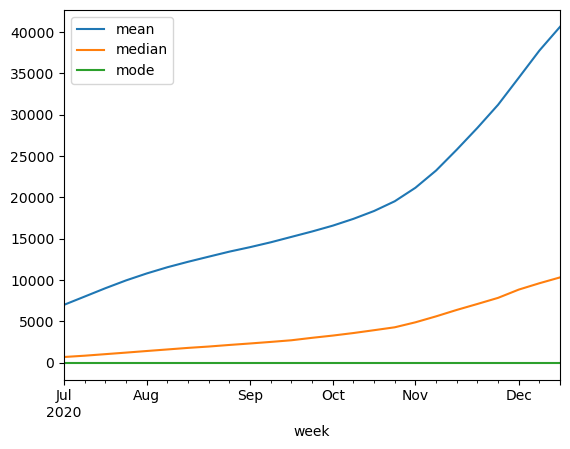
- Above is the US pattern graph
##### I observe that there is a constant raise in the cases and deaths from week one to till last week across US and the same is observed in case of all the 5 states analysed. 
##### Highest number of cases and deaths are recorded in the months of November and December.
##### Peak cases and Deaths for each state are recorded in the   and the same pattern is observed in the case of  entire US dataset as well. 

### # Normalize by population, use a normalization factor which is able to identify cases and deaths, for example try per 10,000 or 100,000 (this depends on the population).

In [25]:
 cases_data = pd.read_csv("./covid_confirmed_usafacts.csv")
 print(cases_data)


      countyFIPS            County Name State  StateFIPS  2020-01-22  \
0              0  Statewide Unallocated    AL          1           0   
1           1001        Autauga County     AL          1           0   
2           1003        Baldwin County     AL          1           0   
3           1005        Barbour County     AL          1           0   
4           1007           Bibb County     AL          1           0   
...          ...                    ...   ...        ...         ...   
3188       56037     Sweetwater County     WY         56           0   
3189       56039          Teton County     WY         56           0   
3190       56041          Uinta County     WY         56           0   
3191       56043       Washakie County     WY         56           0   
3192       56045         Weston County     WY         56           0   

      2020-01-23  2020-01-24  2020-01-25  2020-01-26  2020-01-27  ...  \
0              0           0           0           0          

- The below code comprises two similar functions, get_normalized_data_deaths and get_normalized_data_cases, intended to calculate the log10-normalized sum of COVID-19 deaths and confirmed cases per 10,000 people for a specified U.S. state within a date range (July 6, 2020, to December 27, 2020). The normalization process involves dividing the total deaths or cases by the state's total population (assumed to be in a DataFrame named population_data) and then applying the logarithm base 10 to the result.

<Axes: title={'center': 'normalized cases of the states'}>

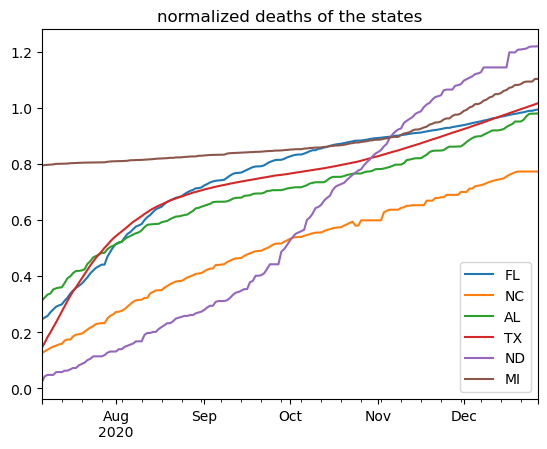

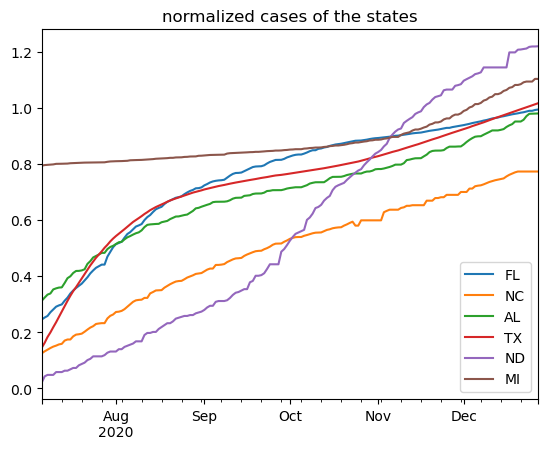

In [114]:
def get_normalized_data_deaths(state : str):
    deaths_data = pd.read_csv("./covid_deaths_usafacts.csv")
    deaths_data = deaths_data[deaths_data["State"] == state]
    filtered_dates = deaths_data.loc[:, [i not in ["countyFIPS","County Name", "State", "StateFIPS"] for i in deaths_data]] #Extract non dates

    filtered_dates.columns = pd.to_datetime(filtered_dates.columns) #Fix columns to be date times
    filtered_dates = filtered_dates.loc[:, [(i <= datetime.datetime(2020, 12, 27)) and (i >= datetime.datetime(2020, 7, 6)) for i in filtered_dates]]
    #print(dates)
    #(dates.sum())

    population_sum = population_data[population_data["State"] == state]["population"].sum()
    #print(population_sum)

    normalized_sum_deaths = ((filtered_dates.sum()/population_sum)*10000).agg(np.log10)
    return normalized_sum_deaths



normalized_death_values_for_states = pd.DataFrame()

states = ["FL", "NC", "AL", "TX", "ND", "MI"]
for i in states:
    
    normalized_death_values_for_states[i] = get_normalized_data_deaths(i)
normalized_death_values_for_states.plot(title="normalized deaths of the states")

def get_normalized_data_cases(state : str):
    cases_data = pd.read_csv("./covid_confirmed_usafacts.csv")
    cases_data = cases_data[deaths_data["State"] == state]
    filtered_dates = cases_data.loc[:, [i not in ["countyFIPS","County Name", "State", "StateFIPS"] for i in cases_data]] #Extract non dates

    filtered_dates.columns = pd.to_datetime(filtered_dates.columns) #Fix columns to be date times
    filtered_dates = filtered_dates.loc[:, [(i <= datetime.datetime(2020, 12, 27)) and (i >= datetime.datetime(2020, 7, 6)) for i in cases_data]]
    #print(dates)
    #(dates.sum())

    population_sum = population_data[population_data["State"] == state]["population"].sum()
    #print(population_sum)

    normalized_sum_deaths = ((filtered_dates.sum()/population_sum)*10000).agg(np.log10)
    return normalized_sum_deaths



normalized_cases_values_for_states = pd.DataFrame()

states = ["FL", "NC", "AL", "TX", "ND", "MI"]
for i in states:
    
    normalized_cases_values_for_states[i] = get_normalized_data_deaths(i)
normalized_cases_values_for_states.plot(title="normalized cases of the states")


    
    
    
    

#### Analysis
-  cases and deaths of state appear to increase in normalized cases over time, with some fluctuations. 

### Identify five counties within a state of your choice with high cases and death rates.

##### Identify top 5 infected counties for cases.
- The below code filters a DataFrame cases_data for rows where the 'State' column equals 'NC' (North Carolina), focusing on COVID-19 cases data. It then selects specific columns: 'countyFIPS', 'County Name', 'State', and case counts for the date '2020-12-27'. After this selection, it identifies the top 5 counties with the highest number of COVID-19 cases on '2020-12-27' by using the nlargest method, which returns the rows with the 5 largest values for the specified date. Finally, it prints these top 5 counties along with their 'countyFIPS', 'County Name', 'State', and case counts for '2020-12-27', showcasing the areas within North Carolina that had the highest number of reported cases on that specific date.

In [62]:
filtered_df = cases_data[cases_data['State'] == 'NC']

# Correctly selecting specific columns
filtered_df = filtered_df[['countyFIPS', 'County Name', 'State', '2020-12-27']]
#print(filtered_df)
top_5_counties = filtered_df.nlargest(5, '2020-12-27')

print(top_5_counties)



      countyFIPS          County Name State  2020-12-27
1983       37119  Mecklenburg County     NC       57182
2015       37183         Wake County     NC       39073
1964       37081     Guilford County     NC       22529
1957       37067      Forsyth County     NC       18795
1959       37071       Gaston County     NC       13897


##### Identify top 5 infected counties for deaths
- Implemented the same code as of cases for identifying the top 5 infected counties.

In [66]:
filtered_df = deaths_data[deaths_data['State'] == 'NC']

# Correctly selecting specific columns
filtered_df = filtered_df[['countyFIPS', 'County Name', 'State', '2020-12-27']]
#print(filtered_df)
top_5_counties = filtered_df.nlargest(5, '2020-12-27')
top_5_county_names = top_5_counties['County Name'].tolist()

print(top_5_counties)
print(top_5_county_names)

      countyFIPS          County Name State  2020-12-27
1983       37119  Mecklenburg County     NC         507
2015       37183         Wake County     NC         337
1964       37081     Guilford County     NC         293
1959       37071       Gaston County     NC         217
1957       37067      Forsyth County     NC         200
['Mecklenburg County ', 'Wake County ', 'Guilford County ', 'Gaston County ', 'Forsyth County ']


## Plot weekly trends (cases and deaths) for the top 5 infected counties. Show plots by raw values and log normalized values.
-The below  code performs a focused analysis on COVID-19 death data within North Carolina (NC), specifically targeting the top 5 counties with the highest death counts. It starts by filtering the overall death data to include only entries from NC and further narrows this down to the specified top counties. It then selects data columns representing dates within a given range (July 6, 2020, to December 27, 2020), excluding administrative columns unrelated to date-specific death counts.

The analysis proceeds to visualize this filtered dataset in two distinct plots:

Raw Death Counts Plot: This graph displays the trend of COVID-19 deaths over time for each of the top 5 counties, using raw death counts. The date range provides a temporal context for the analysis, allowing for the observation of patterns or spikes in the data.

Log10-normalized Deaths Plot: To address potential scale differences across counties and make the trends more visually comparable, the second plot applies a log10 transformation to the death counts. This normalization step helps in emphasizing the rate of change in deaths rather than the absolute numbers, which can be particularly useful when dealing with exponential growth patterns typical of pandemic spread.

      2020-07-06  2020-07-07  2020-07-08  2020-07-09  2020-07-10  2020-07-11  \
1957          37          37          37          37          39          39   
1959          12          12          14          15          15          15   
1964         117         118         118         121         123         123   
1983         154         154         158         158         158         159   
2015          49          52          54          57          60          60   

      2020-07-12  2020-07-13  2020-07-14  2020-07-15  ...  2020-12-18  \
1957          40          40          40          40  ...         197   
1959          15          15          15          17  ...         204   
1964         123         123         128         128  ...         291   
1983         159         163         163         164  ...         499   
2015          71          71          76          77  ...         333   

      2020-12-19  2020-12-20  2020-12-21  2020-12-22  2020-12-23  2020-12-24  \


<Figure size 800x400 with 0 Axes>

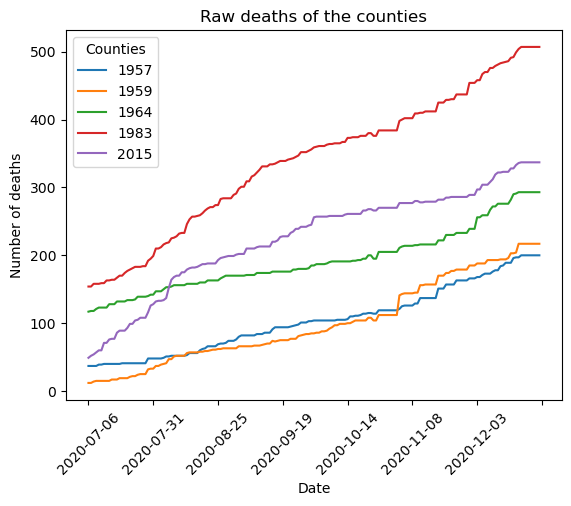

<Figure size 1000x600 with 0 Axes>

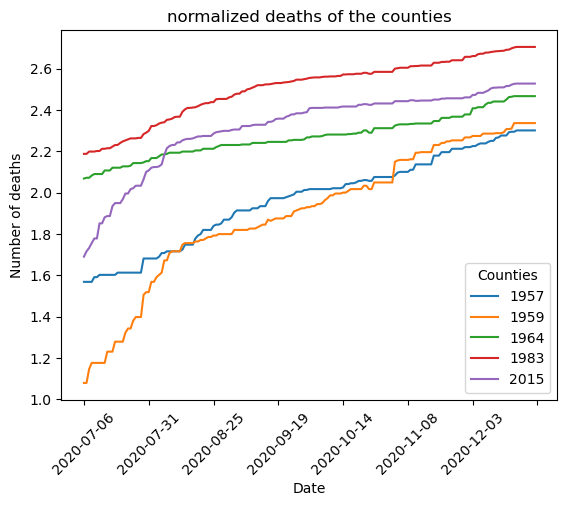

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'dates' is a predefined DataFrame where each column represents a day
filtered_df = deaths_data[deaths_data['State'] == 'NC'].copy()

selected_counties_df = filtered_df[filtered_df['County Name'].isin(top_5_county_names)].copy()

date_columns = selected_counties_df.columns[~selected_counties_df.columns.isin(["countyFIPS", "County Name", "State", "StateFIPS"])]

# Extract the columns with dates only
dates = selected_counties_df.loc[:, date_columns]
#print(dates)
start_date= '2020-07-06'
end_date= '2020-12-27'
filtered_dates = dates.loc[:, (dates.columns >= start_date) & (dates.columns <= end_date)]
print(filtered_dates)
#filtered_dates.T.plot(title = " raw cases of the counties",x_rot=45)
plt.figure(figsize=(8, 4))
filtered_dates.T.plot(title="Raw deaths of the counties", rot=45)  # Corrected rot parameter
plt.ylabel('Number of deaths')
plt.xlabel('Date')
plt.legend(title='Counties')
plt.show()


#filtered_dates.T.plot(title = " raw cases of the counties",x_rot=45)
plt.figure(figsize=(10, 6))
filtered_dates.apply(np.log10).T.plot(title="normalized deaths of the counties", rot=45)  # Corrected rot parameter
plt.ylabel('Number of deaths')
plt.xlabel('Date')
plt.legend(title='Counties')
plt.show()

- Performing the same code as deaths for cases.

      2020-07-06  2020-07-07  2020-07-08  2020-07-09  2020-07-10  2020-07-11  \
1957        3353        3423        3450        3525        3580        3622   
1959        1385        1443        1479        1547        1640        1742   
1964        3149        3208        3275        3361        3440        3495   
1983       13111       13317       13489       13757       14157       14607   
2015        6150        6299        6471        6704        6898        7204   

      2020-07-12  2020-07-13  2020-07-14  2020-07-15  ...  2020-12-18  \
1957        3675        3731        3785        3850  ...       17734   
1959        1811        1859        1946        2003  ...       13237   
1964        3604        3682        3760        3840  ...       21420   
1983       15024       15319       15680       15950  ...       54463   
2015        7447        7640        7737        7971  ...       37328   

      2020-12-19  2020-12-20  2020-12-21  2020-12-22  2020-12-23  2020-12-24  \


<Figure size 800x400 with 0 Axes>

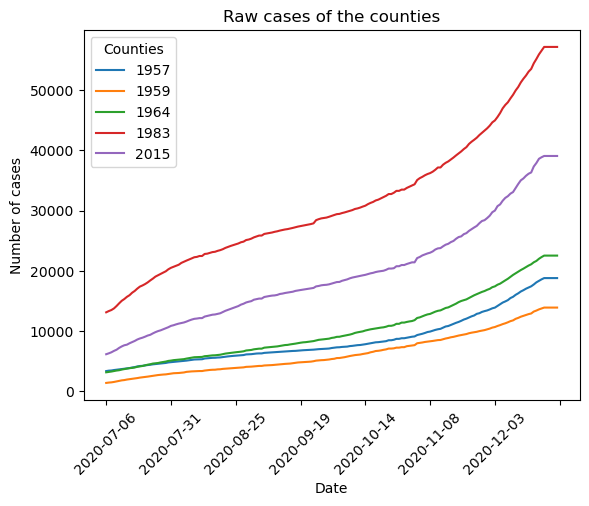

<Figure size 1000x600 with 0 Axes>

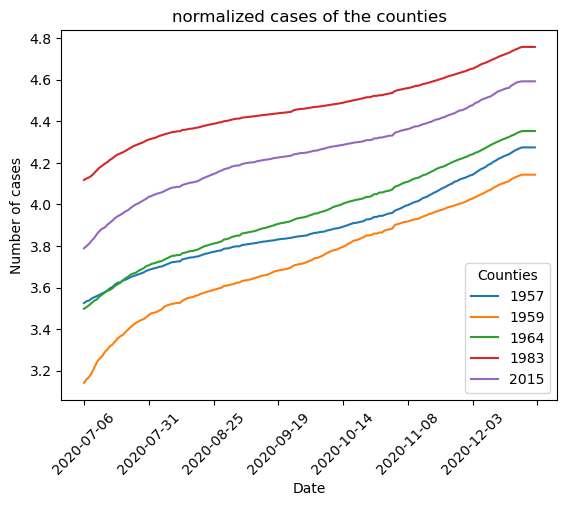

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'dates' is a predefined DataFrame where each column represents a day
filtered_df = cases_data[cases_data['State'] == 'NC'].copy()

selected_counties_df = filtered_df[filtered_df['County Name'].isin(top_5_county_names)].copy()

date_columns = selected_counties_df.columns[~selected_counties_df.columns.isin(["countyFIPS", "County Name", "State", "StateFIPS"])]

# Extract the columns with dates only
dates = selected_counties_df.loc[:, date_columns]
#print(dates)
start_date= '2020-07-06'
end_date= '2020-12-27'
filtered_dates = dates.loc[:, (dates.columns >= start_date) & (dates.columns <= end_date)]
print(filtered_dates)
#filtered_dates.T.plot(title = " raw cases of the counties",x_rot=45)
plt.figure(figsize=(8, 4))
filtered_dates.T.plot(title="Raw cases of the counties", rot=45)  # Corrected rot parameter
plt.ylabel('Number of cases')
plt.xlabel('Date')
plt.legend(title='Counties')
plt.show()


#filtered_dates.T.plot(title = " raw cases of the counties",x_rot=45)
plt.figure(figsize=(10, 6))
filtered_dates.apply(np.log10).T.plot(title="normalized cases of the counties", rot=45)  # Corrected rot parameter
plt.ylabel('Number of cases')
plt.xlabel('Date')
plt.legend(title='Counties')
plt.show()

#### Plotting the weekly trends for cases for top 5 infected counties
- The below code performs a detailed analysis of COVID-19 case data for the top 5 counties in North Carolina (NC), focusing on the time period from July 6, 2020, to December 27, 2020. It calculates weekly statistics—mean, median, and mode—for the case counts and then visualizes these statistics in a series of plots. The analysis includes both the raw weekly statistics and their log10-normalized values to facilitate comparison across counties and over time.

- The procedure involves filtering the case data to include only the relevant state and counties, selecting date columns within the specified range, and converting these columns to datetime format for accurate time series analysis. For each week within the date range, it computes the mean, median, and mode of the case counts, stores these values, and then transposes the resulting DataFrames for plotting.

- The visualization consists of six subplots arranged vertically: three for the raw weekly statistics (mean, median, mode) and three for the log10-normalized values of these statistics. The plots aim to provide insights into the temporal dynamics of COVID-19 cases, highlighting differences and trends in the spread of the virus among the top 5 counties in NC. The use of normalization helps in comparing the data on a similar scale, especially useful in dealing with data that spans several orders of magnitude.


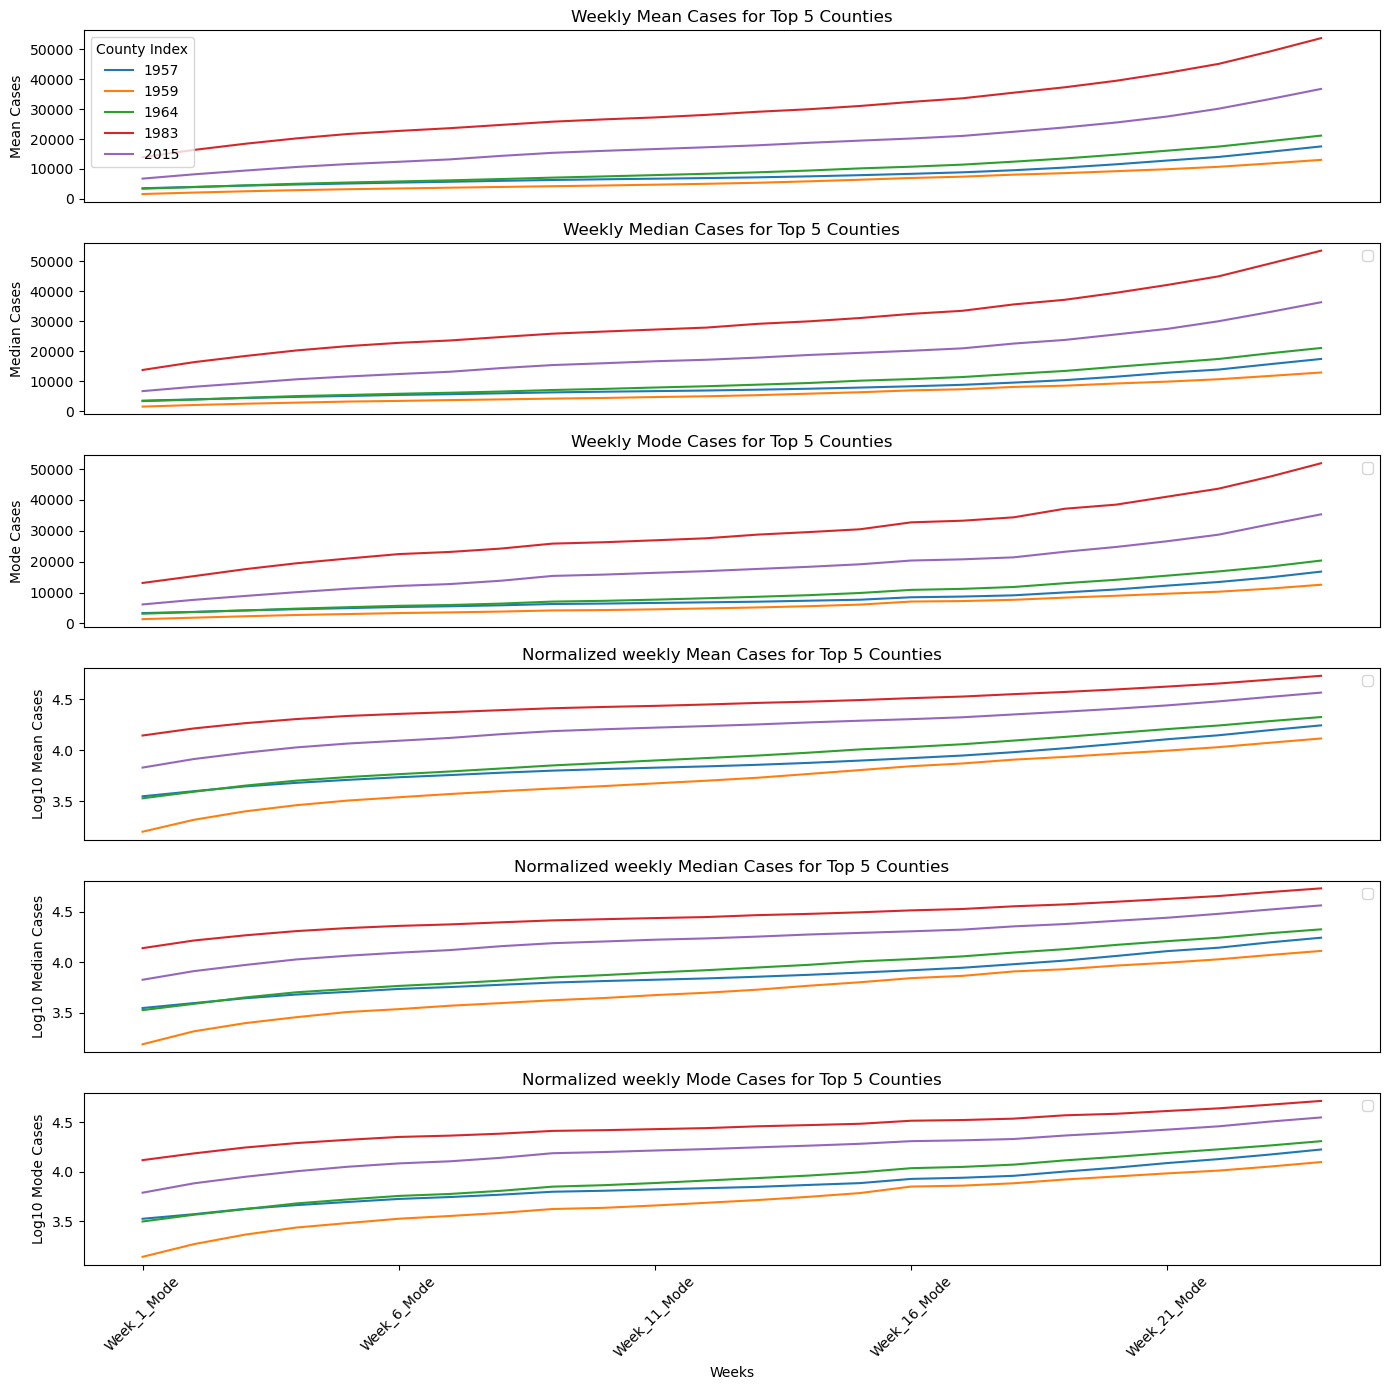

In [110]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'cases_data' and 'top_5_county_names' are predefined

# Filter for 'NC' state and make a copy
filtered_df = cases_data[cases_data['State'] == 'NC'].copy()

# Filter for top 5 counties and make a copy
selected_counties_df = filtered_df[filtered_df['County Name'].isin(top_5_county_names)].copy()

# Identify columns that represent dates
date_columns = selected_counties_df.columns[~selected_counties_df.columns.isin(["countyFIPS", "County Name", "State", "StateFIPS"])]

# Ensure these columns are in datetime format for proper filtering
dates = selected_counties_df.loc[:, date_columns]
dates.columns = pd.to_datetime(dates.columns)

# Define start and end dates for filtering
start_date = pd.to_datetime('2020-07-06')
end_date = pd.to_datetime('2020-12-27')

# Filter for the specified date range
filtered_dates = dates.loc[:, (dates.columns >= start_date) & (dates.columns <= end_date)]

# Initialize a DataFrame to store weekly means
weekly_mean_c = pd.DataFrame()
weekly_median_c = pd.DataFrame()
weekly_mode_c = pd.DataFrame()

# Calculate weekly means
date_range = pd.date_range(start_date, end_date, freq='W-MON')
for i, date in enumerate(date_range[:-1]):
    week_start = date
    week_end = date_range[i + 1] - pd.Timedelta(days=1)
    
    # Select columns for the current week
    current_week_columns = filtered_dates.columns[(filtered_dates.columns >= week_start) & (filtered_dates.columns <= week_end)]
    
    if not current_week_columns.empty:
        weekly_mean = filtered_dates[current_week_columns].mean(axis=1)
        weekly_mean_c[f'Week_{i+1}_Mean'] = weekly_mean
        
        # Median
        weekly_median = filtered_dates[current_week_columns].median(axis=1)
        weekly_median_c[f'Week_{i+1}_Median'] = weekly_median
        
        # Mode - Mode may return multiple values; taking the first one for simplicity
        weekly_mode = filtered_dates[current_week_columns].mode(axis=1)[0]
        weekly_mode_c[f'Week_{i+1}_Mode'] = weekly_mode

# Transpose for plotting
#weekly_mean_c = weekly_mean_c.T
#weekly_median_c = weekly_median_c.T
#weekly_mode_c = weekly_mode_c.T

# Plotting
plt.figure(figsize=(14, 14))

# Plot Mean
plt.subplot(6, 1, 1)
weekly_mean_c.T.plot(ax=plt.gca())  # Transposed for plotting
plt.title('Weekly Mean Cases for Top 5 Counties')
plt.ylabel('Mean Cases')
plt.xticks([])  # Hide x-axis labels to save space
plt.legend(title='County Index', loc='upper left')

# Plot Median
plt.subplot(6, 1, 2)
weekly_median_c.T.plot(ax=plt.gca())  # Transposed for plotting
plt.title('Weekly Median Cases for Top 5 Counties')
plt.ylabel('Median Cases')
plt.xticks([])  # Hide x-axis labels to save space
plt.legend([])  # Hide legend to save space

# Plot Mode
plt.subplot(6, 1, 3)
weekly_mode_c.T.plot(ax=plt.gca())  # Transposed for plotting
plt.title('Weekly Mode Cases for Top 5 Counties')
plt.ylabel('Mode Cases')
plt.xticks([])  # Hide x-axis labels to save space
plt.legend([])  # Hide legend to save space

# Plot Normalized Mean (using log10)
plt.subplot(6, 1, 4)
weekly_mean_c.apply(np.log10).T.plot(ax=plt.gca())  # Apply log10 and transpose for plotting
plt.title('Normalized weekly Mean Cases for Top 5 Counties')
plt.ylabel('Log10 Mean Cases')
plt.xticks([])  # Hide x-axis labels to save space
plt.legend([])  # Hide legend to save space

# Plot Normalized Median (using log10)
plt.subplot(6, 1, 5)
weekly_median_c.apply(np.log10).T.plot(ax=plt.gca())  # Apply log10 and transpose for plotting
plt.title('Normalized weekly Median Cases for Top 5 Counties')
plt.ylabel('Log10 Median Cases')
plt.xticks([])  # Hide x-axis labels to save space
plt.legend([])  # Hide legend to save space

# Plot Normalized Mode (using log10)
plt.subplot(6, 1, 6)
weekly_mode_c.apply(np.log10).T.plot(ax=plt.gca())  # Apply log10 and transpose for plotting
plt.title('Normalized weekly Mode Cases for Top 5 Counties')
plt.ylabel('Log10 Mode Cases')
plt.xticks(rotation=45)  # Show x-axis labels and rotate for readability
plt.xlabel('Weeks')
plt.legend([])  # Hide legend to save space

plt.tight_layout()  # Adjust layout
plt.show()


#### plotting the weekly trends for deaths for top 5 infected counties
- Did the same procedure as of cases.

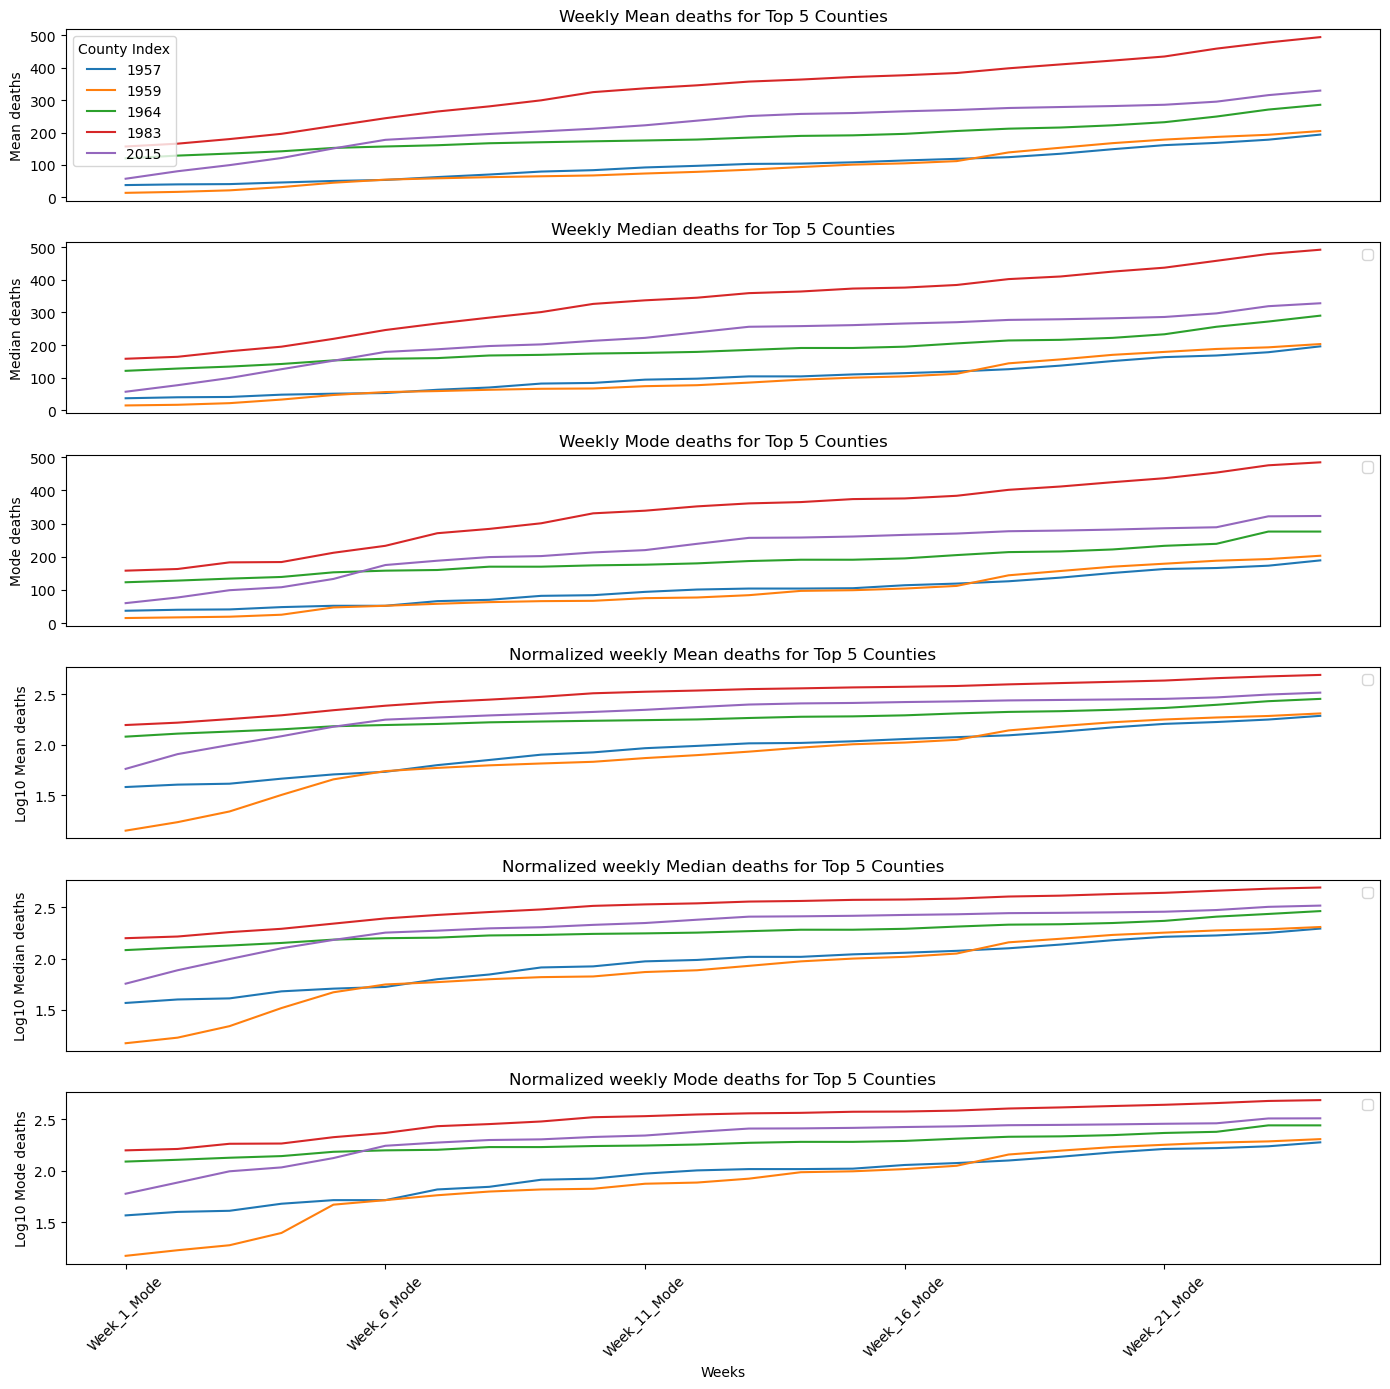

In [115]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'cases_data' and 'top_5_county_names' are predefined

# Filter for 'NC' state and make a copy
filtered_df = deaths_data[deaths_data['State'] == 'NC'].copy()

# Filter for top 5 counties and make a copy
selected_counties_df = filtered_df[filtered_df['County Name'].isin(top_5_county_names)].copy()

# Identify columns that represent dates
date_columns = selected_counties_df.columns[~selected_counties_df.columns.isin(["countyFIPS", "County Name", "State", "StateFIPS"])]

# Ensure these columns are in datetime format for proper filtering
dates = selected_counties_df.loc[:, date_columns]
dates.columns = pd.to_datetime(dates.columns)

# Define start and end dates for filtering
start_date = pd.to_datetime('2020-07-06')
end_date = pd.to_datetime('2020-12-27')

# Filter for the specified date range
filtered_dates = dates.loc[:, (dates.columns >= start_date) & (dates.columns <= end_date)]

# Initialize a DataFrame to store weekly means
weekly_mean_c = pd.DataFrame()
weekly_median_c = pd.DataFrame()
weekly_mode_c = pd.DataFrame()

# Calculate weekly means
date_range = pd.date_range(start_date, end_date, freq='W-MON')
for i, date in enumerate(date_range[:-1]):
    week_start = date
    week_end = date_range[i + 1] - pd.Timedelta(days=1)
    
    # Select columns for the current week
    current_week_columns = filtered_dates.columns[(filtered_dates.columns >= week_start) & (filtered_dates.columns <= week_end)]
    
    if not current_week_columns.empty:
        weekly_mean = filtered_dates[current_week_columns].mean(axis=1)
        weekly_mean_c[f'Week_{i+1}_Mean'] = weekly_mean
        
        # Median
        weekly_median = filtered_dates[current_week_columns].median(axis=1)
        weekly_median_c[f'Week_{i+1}_Median'] = weekly_median
        
        # Mode - Mode may return multiple values; taking the first one for simplicity
        weekly_mode = filtered_dates[current_week_columns].mode(axis=1)[0]
        weekly_mode_c[f'Week_{i+1}_Mode'] = weekly_mode

# Transpose for plotting
#weekly_mean_c = weekly_mean_c.T
#weekly_median_c = weekly_median_c.T
#weekly_mode_c = weekly_mode_c.T

# Plotting
plt.figure(figsize=(14, 14))

# Plot Mean
plt.subplot(6, 1, 1)
weekly_mean_c.T.plot(ax=plt.gca())  # Transposed for plotting
plt.title('Weekly Mean deaths for Top 5 Counties')
plt.ylabel('Mean deaths')
plt.xticks([])  # Hide x-axis labels to save space
plt.legend(title='County Index', loc='upper left')

# Plot Median
plt.subplot(6, 1, 2)
weekly_median_c.T.plot(ax=plt.gca())  # Transposed for plotting
plt.title('Weekly Median deaths for Top 5 Counties')
plt.ylabel('Median deaths')
plt.xticks([])  # Hide x-axis labels to save space
plt.legend([])  # Hide legend to save space

# Plot Mode
plt.subplot(6, 1, 3)
weekly_mode_c.T.plot(ax=plt.gca())  # Transposed for plotting
plt.title('Weekly Mode deaths for Top 5 Counties')
plt.ylabel('Mode deaths')
plt.xticks([])  # Hide x-axis labels to save space
plt.legend([])  # Hide legend to save space

# Plot Normalized Mean (using log10)
plt.subplot(6, 1, 4)
weekly_mean_c.apply(np.log10).T.plot(ax=plt.gca())  # Apply log10 and transpose for plotting
plt.title('Normalized weekly Mean deaths for Top 5 Counties')
plt.ylabel('Log10 Mean deaths')
plt.xticks([])  # Hide x-axis labels to save space
plt.legend([])  # Hide legend to save space

# Plot Normalized Median (using log10)
plt.subplot(6, 1, 5)
weekly_median_c.apply(np.log10).T.plot(ax=plt.gca())  # Apply log10 and transpose for plotting
plt.title('Normalized weekly Median deaths for Top 5 Counties')
plt.ylabel('Log10 Median deaths')
plt.xticks([])  # Hide x-axis labels to save space
plt.legend([])  # Hide legend to save space

# Plot Normalized Mode (using log10)
plt.subplot(6, 1, 6)
weekly_mode_c.apply(np.log10).T.plot(ax=plt.gca())  # Apply log10 and transpose for plotting
plt.title('Normalized weekly Mode deaths for Top 5 Counties')
plt.ylabel('Log10 Mode deaths')
plt.xticks(rotation=45)  # Show x-axis labels and rotate for readability
plt.xlabel('Weeks')
plt.legend([])  # Hide legend to save space

plt.tight_layout()  # Adjust layout
plt.show()


#### ### Conclusion
###### I can observe that the counties pretty much follow the same pattern as their respective state does.
###### The cases and deaths are higher in count in the week (end of december) for all the counties, the same is observed in the case of the North Carolina state as well.
##### Leading to the conclusion that the counties follow same pattern as state does.
